# Green-Blue data generator

This notebook is a generator for inseparable classification data.

A process to draw some colors on the Green to Blue line segment and probabilistic color label assignmengt (Green or Blue) is described. Finally, a  mixture of 3 populations with different color perception generate the dataset, comprising of a color label (target class), a color component and the population class.

#### Ususal imports:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math


### Utility functions:
  
Draw a random color (green intensity)

Compute softmax of color (probability to pick the green as color label from green intensity)


In [0]:
def draw_color():
  return np.random.rand()

def softmax_color(c, temp = 0.1, green_shift = 0.0):
  return math.exp((c-green_shift)/temp)/(math.exp((c-green_shift)/temp) + math.exp((1-c+green_shift)/temp))


#### Example of random color drawing

0.5734222718040192
0.8128209849742749


<Container object of 1 artists>

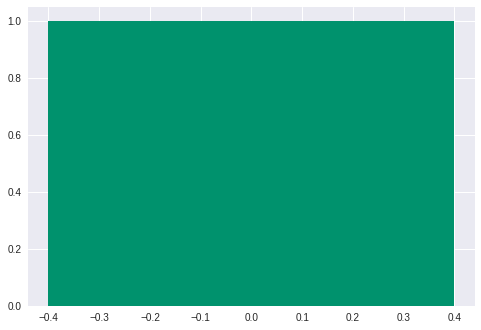

In [6]:
green_c = draw_color()
green_p = softmax_color(green_c)

print(green_c)
print(green_p)
plt.bar(0, 1, color = (0, green_c, 1-green_c) )

#### Plot the Green color labelling probability as a function of the green intensity


Take the opportunity to look at the effect of temperature (`temp` argument) and shift (`green_shift` argument)

In [0]:
colcs = []
colps = []

for i in range(100):
  green_c = draw_color()
  green_p = softmax_color(green_c, temp = 0.1, green_shift = 0.0)
  colcs.append(green_c)
  colps.append(green_p)

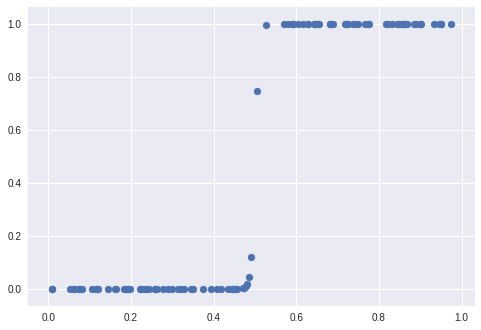

In [11]:
plt.scatter(colcs, colps)

Function to pick a color and a label



In [0]:
def eval_rnd_color( temp = 0.1, green_shift = 0.0):
  green_c = draw_color()
  green_p = softmax_color(green_c, temp, green_shift)
  if (np.random.rand() > green_p):
    col = 0
    col_name = 'green'
  else:
    col = 1
    col_name = 'blue'
  return green_c, col, col_name  

In [50]:
eval_rnd_color()

(0.00323214436216257, 0, 'green')

#### Run a bunch of simulations to obtain a distribution of colors labels picks

In [0]:
xs = []
ys = []
for i in range(1000):
  x,y, _ = eval_rnd_color()
  xs.append(x)
  ys.append(y)

xs = np.array(xs)
ys = np.array(ys)

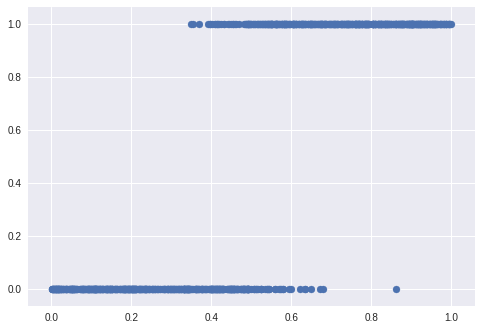

In [56]:
plt.scatter(xs, ys)

#### Plot histograms and colors

(array([10., 14., 43., 57., 50., 54., 65., 62., 75., 53.]),
 array([0.34876704, 0.41386618, 0.47896533, 0.54406447, 0.60916361,
        0.67426275, 0.73936189, 0.80446104, 0.86956018, 0.93465932,
        0.99975846]),
 <a list of 10 Patch objects>)

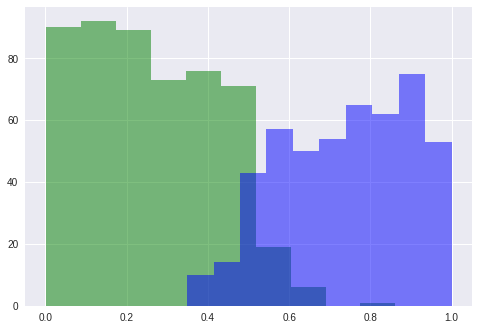

In [58]:
plt.hist(xs[np.isin(ys,0)], color = 'green', alpha=0.5)
plt.hist(xs[np.isin(ys,1)], color = 'blue', alpha=0.5)

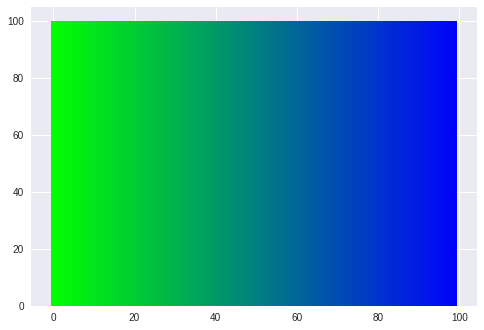

In [61]:
for i in range(100):
  plt.bar(i, 100, width=1.0, color=[0.0, 1.0-i/100, i/100])

**Mix 3 populations generating color labels assignments as save file**

In [0]:
outfile = open("/tmp/green-blue.txt", "w")

for i in range(100000):
  rnd = np.random.rand()
  if rnd < 0.1:
    x,y,label = eval_rnd_color(temp = 0.2, green_shift = -0.2)
    pop = 'greeniac'
  elif rnd < 0.25:
    x,y,label = eval_rnd_color(temp = 0.1, green_shift = 0.1)
    pop = 'bluholic'    
  else:
    x,y,label = eval_rnd_color()
    pop = 'normal' 
  outfile.write("{},{},{}\n".format(label, x, pop))
  
outfile.close()

In [66]:
!wc /tmp/green-blue.txt

 100000  100000 3225532 /tmp/green-blue.txt
